# Code Playground for Percept Data



<b> Data is required to converted into the BIDS-standard. </b>




## 0. Loading packages and functions, defining paths



In [147]:
# Importing Python and external packages
import os
import sys
import importlib
import json
from dataclasses import dataclass, field, fields
from itertools import compress
import csv
import pandas as pd
import numpy as np

import sklearn as sk
import scipy
import matplotlib.pyplot as plt
from scipy import signal

#mne
import mne_bids
import mne

In [ ]:
# additionally imported from Varvara
# from importlib import reload          # is this necessary?

# from scipy.signal import spectrogram, hanning     # is this necessary?

# from mne.time_frequency import tfr_morlet         # is this necessary?

In [ ]:
# check some package versions for documentation and reproducability
print('Python sys', sys.version)
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('mne_bids', mne_bids.__version__)
print('mne', mne.__version__)
print('sci-py', scipy.__version__)
print('sci-kit learn', sk.__version__)

In [310]:
# define local storage directories
matfile_path = '/Users/jenniferbehnke/Coding/Perceive_output/ieeg_ses-2021080602000195_3MFU/sub021_ses-2021080602000195_run-BrainSense20210806020700.mat'
folder = '/Users/jenniferbehnke/Coding/Perceive_output/ieeg_ses-2021080602000195_3MFU/'


# check working directory
print(os.getcwd())

# get folder above a certain folder
print(os.path.dirname(os.getcwd()))

# change working directory to project-code folder
os.chdir('/Users/jenniferbehnke/Coding/Perceive_output/ieeg_ses-2021080602000195_3MFU/')


/Users/jenniferbehnke/Coding/Perceive_output/ieeg_ses-2021080602000195_3MFU
/Users/jenniferbehnke/Coding/Perceive_output


## 1. Pre-Work - Getting into the Files

### Explore data

In [274]:
# import file as MNE object
# saved in variable data as RawArray

raw = mne.io.read_raw_fieldtrip(
    matfile_path,
    info={},
    data_name='data',
)
raw.info

/Applications/MNE-Python/.mne-python/lib/python3.10/site-packages/pymatreader/utils.py:230: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Creating RawArray with float64 data, n_channels=6, n_times=3688


/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipykernel_905/2486671268.py:4: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  raw = mne.io.read_raw_fieldtrip(
/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipykernel_905/2486671268.py:4: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_L_13. Making it a MISC channel.
  raw = mne.io.read_raw_fieldtrip(
/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipykernel_905/2486671268.py:4: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_R_02. Making it a MISC channel.
  raw = mne.io.read_raw_fieldtrip(
/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipykernel_905/2486671268.py:4: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms. Making it a MISC channel.
  raw = mne.io.read_raw_fieldtrip(
/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipyke

    Range : 0 ... 3687 =      0.000 ...    14.748 secs
Ready.


<Info | 8 non-empty values
 bads: []
 ch_names: LFP_Stn_L_13, LFP_Stn_R_02, ...
 chs: 4 misc, 2 Stimulus
 custom_ref_applied: False
 dig: 0 items
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 6
 projs: []
 sfreq: 250.0 Hz
>

In [289]:
# load raw-mat file into python
# saved in variable dat as a dict with variable names as keys and loaded matrices as values

#dat = scipy.io.loadmat(filepath)

### Define variables to access relevant data 

In [384]:
ch_names = raw.ch_names
n_chan = len(ch_names)
n_time_samps = raw.n_times #nsamples
time_secs = raw.times #timepoints set to zero
ch_trials = raw._data
sampling_freq = raw.info['sfreq']
time_duration = (n_time_samps/sampling_freq).astype(float)



print(
      f'The data object has:\n\t{n_time_samps} time samples,'
      f'\n\tand a sample frequency of {sampling_freq} Hz' 
      f'\n\twith a recording duration of {time_duration} seconds.' 
      f'\n\t{n_chan} channels were labeled as \n{ch_names}.'
)

The data object has:
	3688 time samples,
	and a sample frequency of 250.0 Hz
	with a recording duration of 14.752 seconds.
	6 channels were labeled as 
['LFP_Stn_L_13', 'LFP_Stn_R_02', 'LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms', 'STIM_L_125Hz_60us', 'STIM_R_125Hz_60us'].


In [341]:
# print(raw.info.keys())

# print(raw.info['dev_ctf_t'])
# raw[0] # indexing of raw shows tuple of data and time (2 arrays)


(array([[-4.44034504, -3.64336003, -4.44034504, ..., 10.9300801 ,
          9.67767509, 10.3608051 ]]),
 array([0.0000e+00, 4.0000e-03, 8.0000e-03, ..., 1.4740e+01, 1.4744e+01,
        1.4748e+01]))

In [304]:
# create dictionary with ch_names as keys : ch_trials as values

mydict = {
    'Time' : time_secs
}
for i, name in enumerate(ch_names):
    # enumerate gives you counter within the loop
    mydict[name] = ch_trials[i]
    print(i, name)

mydict.keys()  


0 LFP_Stn_L_13
1 LFP_Stn_R_02
2 LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms
3 LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms
4 STIM_L_125Hz_60us
5 STIM_R_125Hz_60us


dict_keys(['Time', 'LFP_Stn_L_13', 'LFP_Stn_R_02', 'LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms', 'STIM_L_125Hz_60us', 'STIM_R_125Hz_60us'])

In [386]:
# write dictionary to a csv file and store it in the current folder

df = pd.DataFrame.from_dict(mydict)
# or
# df = pd.DataFrame(data=ch_trials.T, columns=ch_names)

df.to_csv(folder+'mydict.csv', index=False, header=True)

# MNE method to save only a selection of channels and timepoints in .csv
# start_end_secs = np.array([10, 13])
# start_sample, stop_sample = (start_end_secs * sampling_freq).astype(int)
# df = raw.to_data_frame(picks=['LFP_Stn_L_13'], start=start_sample, stop=stop_sample)
# df.to_csv(folder+'mydict.csv')

print(df.head())

    Time  LFP_Stn_L_13  LFP_Stn_R_02  \
0  0.000     -4.440345     -5.806605   
1  0.004     -3.643360     -6.262025   
2  0.008     -4.440345     -3.301795   
3  0.012     -3.757215      4.326490   
4  0.016     -4.098780      5.465040   

   LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms  \
0                                     482.0   
1                                     482.0   
2                                     482.0   
3                                     482.0   
4                                     482.0   

   LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms  STIM_L_125Hz_60us  \
0                                     587.0                0.0   
1                                     587.0                0.0   
2                                     587.0                0.0   
3                                     587.0                0.0   
4                                     587.0                0.0   

   STIM_R_125Hz_60us  
0                0.0  
1                0.0  
2         

In [ ]:
# save all channels in .npy files without timepoints

# all_channels = raw.get_data()
# np.save(file='data_all_channels_.npy', arr=data)


## 2. Plot data

### MNE Plotting Playground

In [362]:
# print the raw[] tuple of ch_trials[0, 0:3] and time_secs[0, 0:3]
print(raw[0, 0:3]) 

(array([[-4.44034504, -3.64336003, -4.44034504]]), array([0.   , 0.004, 0.008]))
[-4.44034504 -3.64336003 -4.44034504]


In [376]:
# extract a selection of raw[]

start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)

channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]

print(f'We here selected the timepoints from {start_sample} until {stop_sample}' 
      f'\nand selected the channel {ch_names[channel_index]}')

# print(raw_selection)

We here selected the timepoints from 2750 until 3250
and selected the channel LFP_Stn_L_13


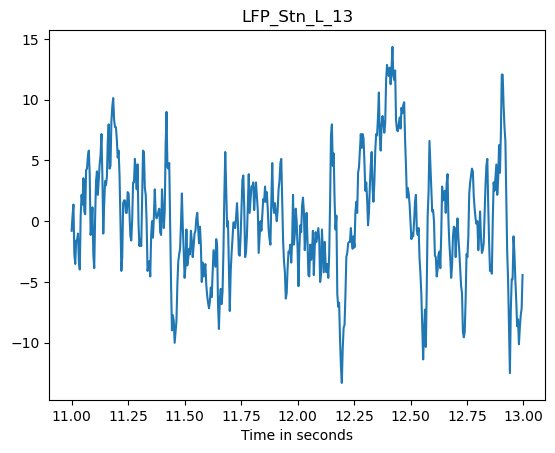

In [377]:
# plot the selected 2 arrays

x = raw_selection[1]        # time in seconds???
y = raw_selection[0].T      # data from ch_trials[channel_index]

plt.plot(x, y)

plt.title(str(ch_names[channel_index]))
plt.xlabel("Time in seconds")
# plt.ylabel() ???

plt.show()

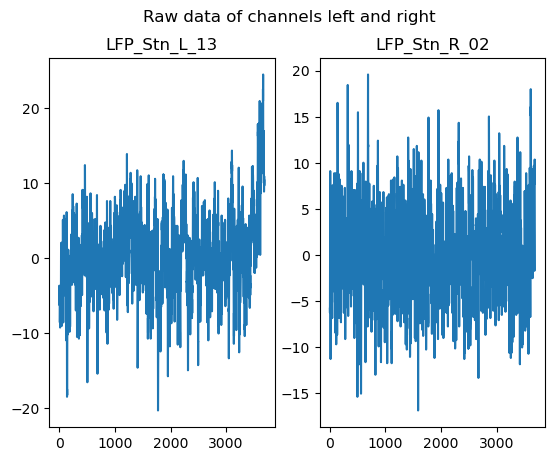

In [370]:
# plotting first and second row of data.trial from Matlab
# plotting first 2 channels 

plt.suptitle("Raw data of channels left and right")


# plot raw data of channel LFP_Stn_L_13
plt.subplot(1,2,1)
plt.plot(ch_trials[0])
plt.title(str(ch_names[0]))

# plot raw data of channel LFP_Stn_R_02
plt.subplot(1,2,2)
plt.plot(ch_trials[1])
plt.title(str(ch_names[1]))

plt.show()


[[-4.44034504 -3.64336003 -4.44034504 ... 10.9300801   9.67767509
  10.3608051 ]]


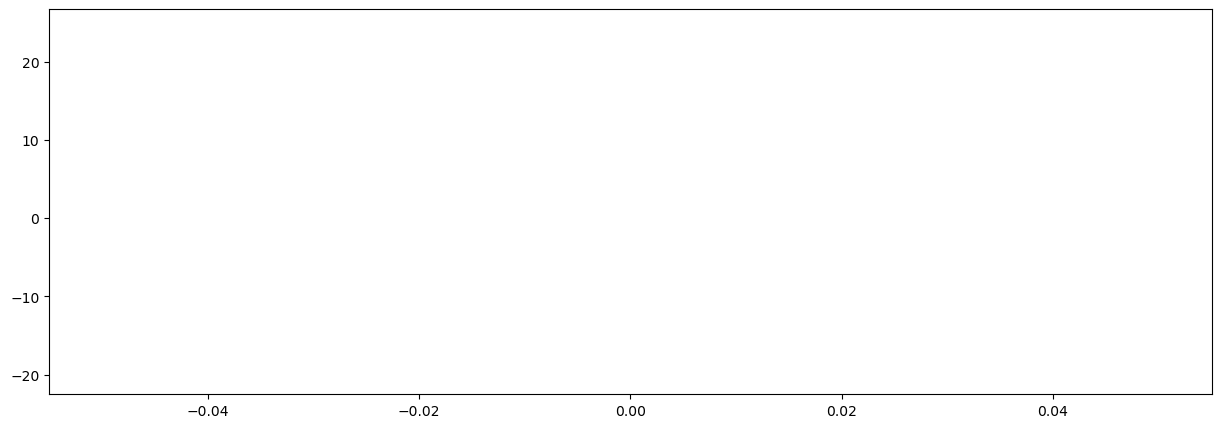

In [387]:
mydat = data.get_data(picks='LFP_Stn_L_13') # saving row 1 from data.trial
print(mydat)

fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(mydat)
plt.show()

### Make some nice plots of the data

In [ ]:
#channels to plot:
chs_to_plot = [ 
    'LFP_R_13_PEAK76',
    'LFP_R_13_STN',
    'STIM_R_125Hz_60'
]


In [ ]:
# time to plot
plot_times = time_secs # time set to zero 

### Code from Varvara

In [ ]:
#Make some nice plots of the data

#channels to plot:
chs_to_plot = [ 
    'LFP_R_13_PEAK76',
    'LFP_R_13_STN',
    'STIM_R_125Hz_60'
]

plot_times = data.times #time
xticks = np.linspace(0, plot_times[-1], 5) #make 5 x-axis ticks, dividing the seconds by 5

fig, axes = plt.subplots(
    1, len(chs_to_plot), figsize=(18, 6)
) #define n of subplots and size

# axes = axes.flatten()
ax_c = 0

for i, name in enumerate(chNamesList):

    
    if name in chs_to_plot:

        if name[-3:] == 'STN':
            axes[ax_c].psd(raw_data[i, :])
            axes[ax_c].set_title(
                f'PSD {name}',
                fontsize=16, color='r'
            )

        else:
            
            axes[ax_c].plot(plot_times, raw_data[i, :])
            axes[ax_c].set_title(name, fontsize=16, color='r')
            axes[ax_c].set_xticks(xticks)
            axes[ax_c].set_xticklabels(np.around(xticks / 60, 1))
                
        ax_c += 1
        
        
# chNamesArr == ch_to_plot

In [ ]:
a = 55.5

In [ ]:
(f'channel1 {name}, #{a}'
 ' because ut was too long')

In [ ]:
chNamesList.index(chs_to_plot)

In [ ]:
data.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = 0, tmax = 20, dB = False, estimate = 'amplitude')
data.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = 60, tmax = 80,  dB = False, estimate = 'amplitude')

In [ ]:
print(type(data._data))
print(data._data.shape)
scan_durn = data._data.shape[1] / data.info['sfreq']
print('Duration of LFP recording = ', scan_durn, 's, or', scan_durn / 60, 'min.')
print(data._data[1, :])

chan = 1 # set channel we want
start_time = int((1000 / 1000) * data.info['sfreq'])
end_time   = int((10000 / 1000) * data.info['sfreq'])
data._data[chan, start_time:end_time]

In [ ]:
mydat = data.get_data(picks=['LFP_Stn_L_13'], start=1, stop=201)
print(mydat.shape)

In [ ]:
fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(data.get_data(picks='STIM_R_125Hz_60us',start=1, stop=20000).T)
plt.show()

In [ ]:
#%matplotlib inline
data.plot(data.get_data(picks='LFP_Stn_L_13'))

In [ ]:
#Pick only channel one and two
data.info['bads'] = ['LFP_Stn_L_13','LFP_Stn_R_02', 'LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms', 'STIM_L_125Hz_60us', 'STIM_R_125Hz_60us'] 
picks = mne.pick_types(data.info, meg='mag', eeg=False, eog=False,
                       stim=False, exclude='bads')

In [ ]:
#events = mne.find_events(raw, stim_channel='LFP_R_13_STN')
trial_onsets = np.array([
       [ 1000 ,      0 ,    1],
       [ 15000 ,      0 ,    2 ]]) #we need the samples
event_dict = {'NoStim':1,'Threshold':2}
fig = mne.viz.plot_events(trial_onsets, sfreq=data.info['sfreq'], first_samp=data.first_samp)
epochs = mne.Epochs(data,events=trial_onsets,event_id = event_dict, tmin=0, tmax=10, baseline = None, preload = True)
epochs.plot_image(picks = 0)

In [ ]:
nostim_ep = epochs['NoStim']
stim_ep = epochs['Threshold']
stim_ep.plot_image(picks = 1)

In [ ]:
M = 200
NFFT = M
win = hanning(M)
overlap = 0.25
overlap_samples = int(round(M*overlap)) # overlap in samples
t, f, S = spectrogram(mydat,window=win,nperseg=M,noverlap=overlap_samples,nfft=NFFT)

# Compute average spectrum
avg_S = np.mean(S,axis=1)

In [ ]:
vars(tfr_morlet)

In [ ]:
freqs = np.arange(1, 125)
D = tfr_morlet(epochs, freqs=freqs, n_cycles=6, return_itc=False, average=True, picks = 1)

In [ ]:
spectrogram(
    mydat,
    fs=125.0, 
#             window=('hanning', 0.25), 
    nperseg=1, noverlap=0.25, nfft=None, detrend='constant', 
                         return_onesided=True, scaling='density', axis=- 1, mode='psd')

In [ ]:
raw = data.filter(l_freq=90, h_freq=5, picks=[0,1])

In [ ]:
#epochs.plot_psd(fmin=5, fmax=90)
D.plot(fmin=5, fmax=40, picks = 1)

In [ ]:
D.plot(mode='zlogratio', picks = 0, baseline=None,
#        vmin = -3, vmax = 8,
       cmap='viridis',
)

In [ ]:
# matplotlib
D.plot(events = trial_onsets, start = 80, duration = 7, n_channels = 1)